In [1]:
import numpy as np
import keras
# Sequential model is a linear stack of layers
from keras.models import Sequential
# In Dense layer every node in the layer is connected to every node in preceding
# layer, which is the case for fully connected neural networks. In our case
# (perceptron), output node is connected to all nodes in the input layer
from keras.layers import Dense
from keras.optimizers import Adam  # Adaptive learning method algorithm optimizer
import matplotlib.pyplot as plt
%matplotlib inline

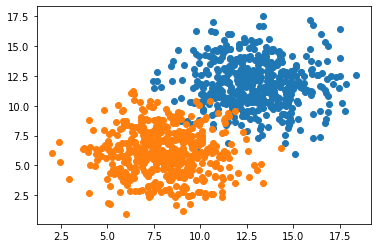

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [3]:
model = Sequential()

# We are going to add a perceptron with an input layer containing two nodes, and
# an ouput layer with single node.
# units=1 because we only have 1 output node producing a single output
# input_shape=(2,) defines the number of input nodes, which is 2 here
# activation used in the output layer or the perceptron
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)  # lr = learning rate

# configure learning process
# loss function is some form of cross entropy which determines the error. Since
# we are dealing with 2 classes, we expect a binary outcome of zeros and ones.
# Thus we will use binary cross entropy as loss function, which calculates the
# crossentropy value for binary classification problem.
# If we had two or more classes, we would use categorical crossentropy, which
# calculates the crossentropy value for multi-class classification
# metric is very similar to a loss function. However, unlike the error function
# whose results as we saw constantly back propagated to minimize the error of
# our model, the result from evaluating a metric are not used to train a model,
# but simply to judge the performance of every epoch, which is going to equal a
# list of functions. In our case we are interested in accuracy, which calculates
# the accuracy of how often the models predictions match the labels of our data.
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

# To train our model and start training our perceptron
# To start training a model that perfectly classifies our data, we first pass
# the training data that we are going to use to train our model: x=X which is
# the keyword argument we have to specify
# Then we have to pass in the labels that we assigned to each data point: y=Y
# zeros which correspond to top region, and ones to bottom region
# If according to labels, our points are misclassified, the error function will
# be high and thus through and optimization algorithm we will act to minimize
# that error.
# Verbose = 1 will display a progress bar of information relating to performance
# of our model at each epoch
# epoch simply refers to whatever iterates over the entire dataset of points and
# labels to try separate our data in discrete classes based on the assigned label
# so, every time is iterates over the entire dataset is an epoch
# However, an epoch is very big to fit to the computer memory. Therefore, we need
# to divide it into several smaller batches --> batch_size=50
# Note that larger batch sizes can result in a significant degreadation in the
# quality of the model
# As our data set includes 500+500 data set, with batch size of 50, it takes 20
# steps for each epoch
# Big value for epochs will overfit the dataset, and small value will
# underestimates, but don't get used to big values for epochs
# shuffle=true will shuffle the training data before each epoch. It will help us
# to not stuck in a local minimum, but rather to go to the global minimum. It
# actually shuffles the rows in our data and for each given iteration, trains
# only a subset of them. This ensures that subset of training data changes with
# every single iteration, and thus if our algorithm doesn't stuck at local min
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=500, shuffle='true')

Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 1.9118 - accuracy: 0.5023
Epoch 2/500
20/20 [==============================] - 0s 996us/step - loss: 0.6496 - accuracy: 0.6102
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.7555
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8000
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8693
Epoch 6/500
20/20 [==============================] - 0s 989us/step - loss: 0.3494 - accuracy: 0.9059
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.9318
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.9416
Epoch 9/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.9407
Epoch 10/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9553
Epoch

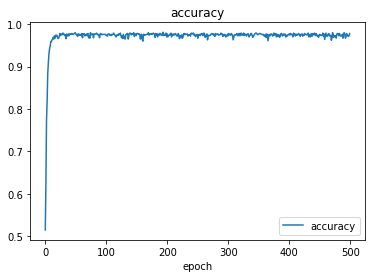

In [4]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

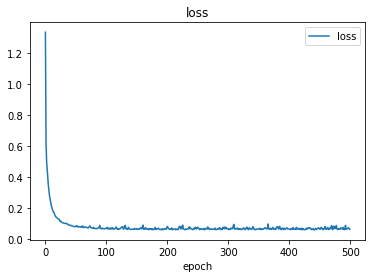

In [5]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

# Plotting precise decision boundary
We are going to plot our dataset along with a **precise decision boundary** that will separate our categorical results. Its equation is obtained directly from our neural network, after going through entire training procedure that we saw earlier

In [7]:
# X = Array of data points (bottom and top region)
# y = Matrix containing labels for dataset. 1 for bottom region and 0 for the top
# model = sequential mode that we have created earlier containing all our neural
# networks. The model that was trained to fit our data!
def plot_decision_boundary(X, y, model):
    # Grid that spans our data

    # x_span = span of x coordinate. 50 equally spaced datapoints between the
    # absolute min & max of horizontal coordinates with a tolerance of 1 in each
    # side
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    # y_span = span of y coordinate. 50 equally spaced datapoints between the
    # absolute min & max of vertical coordinates with a tolerance of 1 in each
    # side
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)

    # xx and yy = square two dimensional array (matrix) as a repeat of x_span
    # and y_span accordingly
    xx, yy = np.meshgrid(x_span, y_span)

    # Flattening the two dimnsional arrays to 1 dimension
    xx_, yy_ = xx.ravel(), yy.ravel()

    # concatinate the xx_ and yy_ arrays in a columnwise arrangement to create a
    # grid
    grid = np.c_[xx_, yy_]  # np.c_ will concatinate the arrays columnwise

    # The entire grid will be fed. The trained model will test all the points
    # inside our 50x50 grid, and returns an array of predictions (probability of
    # any given point being labeled as 1 (being in the positive region))
    pred_func = model.predict(grid)

    # Reshaping the array to have the same dimension as xx or yy. This ensures
    # that prediction results are compatible with the appropriate coordinate
    # counterpart of our grid. By doing this we allow the shape of our
    # prediction data to be consistant with the 50x50 shape of our graph such
    # that every single coordinate in the graph would have its corresponding
    # prediction
    z = pred_func.reshape(xx.shape)

    # Create a 2D contour plot of our predicted results
    plt.contourf(xx, yy, z)

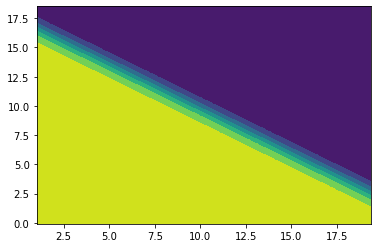

In [8]:
plot_decision_boundary(X, y, model)